In [36]:
%matplotlib inline
import json
import numpy as np

In [37]:
SUMMARY_DIR = '../results/'
dirs = ['_tau_0.001_batchsize_64_goal_True_hindsight_False_eval_True_2017_11_14_16_11_36',
       '_tau_0.001_batchsize_64_goal_True_hindsight_False_eval_True_2017_11_14_16_13_11',
       '_tau_0.001_batchsize_64_goal_True_hindsight_False_eval_True_2017_11_14_16_14_59']
filenames = [SUMMARY_DIR + dir+'/progress.json' for dir in dirs]
print(filenames)

['../results/_tau_0.001_batchsize_64_goal_True_hindsight_False_eval_True_2017_11_14_16_11_36/progress.json', '../results/_tau_0.001_batchsize_64_goal_True_hindsight_False_eval_True_2017_11_14_16_13_11/progress.json', '../results/_tau_0.001_batchsize_64_goal_True_hindsight_False_eval_True_2017_11_14_16_14_59/progress.json']


In [38]:
mean_reward = [0]*20
mean_qmax_value = []
mean_critic_loss = []
mean_q_mean = []
mean_q_std = []
mean_action_mean = []
mean_action_std = []
mean_eval_reward = []

In [39]:
for filename in filenames:
    reward = []
    qmax_value = []
    critic_loss = []
    q_mean = []
    q_std = []
    action_mean = []
    action_std = []
    eval_reward = []
    with open(filename, 'r') as json_data:
        lines = json_data.readlines()
        episode = 0
        for line in lines:

            episode_data = json.loads(line)

            episode = episode_data['episode']

            if 'Eval_reward' in episode_data:
                eval_reward.append(episode_data['Eval_reward'])
            if 'Reward' in episode_data:
                reward.append(episode_data['Reward'])
            if 'Qmax_value' in episode_data:
                qmax_value.append(episode_data['Qmax_value'])
            if 'reference_Q_mean' in episode_data:
                q_mean.append(episode_data['reference_Q_mean'])
            if 'reference_Q_std' in episode_data:
                q_std.append(episode_data['reference_Q_std'])
            if 'Critic_loss' in episode_data:
                critic_loss.append(episode_data['Critic_loss'])
            if 'reference_action_mean' in episode_data:
                action_mean.append(episode_data['reference_action_mean'])
            if 'reference_action_std' in episode_data:
                action_std.append(episode_data['reference_action_std'])
                
    mean_reward = [x+y for x,y in zip(mean_reward, reward)]


In [40]:
import matplotlib.pyplot as plt

In [41]:
print(mean_reward)

[-38.87643498775078, -62.615880870229965, 66.46334625844081, 1.5237958943072698, -26.601244275012263, 18.871450818754553, 27.411942524986298, -59.16086763925051, -113.02409435434596, -129.08195097038845, 124.24049666492817, -203.26345726317157, 8.417056041140086, 7.935043220394647, 78.3623327274782, 187.25454136368944, 48.41035932395904, -4.787408390622147, 24.537566342058348, 289.6987437168837]


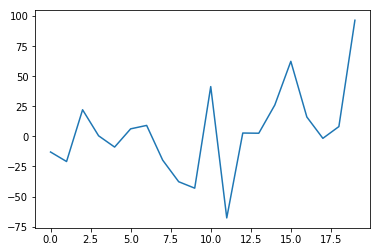

In [42]:
plt.plot(range(20), [x/3 for x in mean_reward])